### Multi-class Classification Exanple

This notebook was created using the part of the "03_convolutional_neural_networks_in_tensorflow.ipynb" notebook as a resource

We will train our model for 10 different image classes

Workflow:

* Become one with the data
* Pre-process the data
* Create a model (start with a baseline)
* Fit the model
* Evaluate the model
* Adjust different parameters and improve model
* Repeat until satisfied

https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb#scrollTo=pV6-1_vFu0Ef

In [1]:
import zipfile
import os
import numpy as np
import pathlib
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense


# import data to workspace
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded data
zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2023-04-18 11:42:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.134.128, 173.194.213.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.134.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   158MB/s    in 3.1s    

2023-04-18 11:42:20 (158 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [2]:
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 10 directori

In [3]:
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))  # Get all of them "*" (ReGex)
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (384, 512, 3)


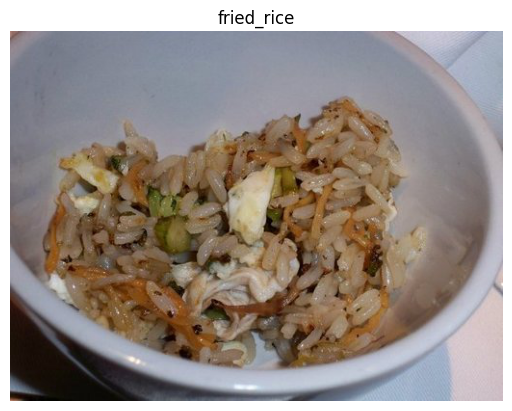

In [5]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names)) # get a random class name

### Data Prepocessing

In [6]:
# Rescale the data and create generator instances
train_data_gen = ImageDataGenerator(rescale=1/255.)
test_data_gen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_data_gen.flow_from_directory(train_dir, target_size=(224,224), batch_size=32, class_mode='categorical')
test_data = test_data_gen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


224x224 image size is the very common size for preprocessing images to.

### Create a model

We can use the TinyVGG model for our multi-class classification problem

* Output layer will have 10 output neurons
* 'softmax' activation function will be used in Ouput layer instead of 'sigmoid' function
* Loss function will be the 'categorical_crossentropy'


In [7]:
from tensorflow import keras

tinyVGG_model = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

model_loss = tf.keras.losses.CategoricalCrossentropy()
model_optimizer = tf.keras.optimizers.Adam()
model_metrics = tf.keras.metrics.Accuracy()

tinyVGG_model.compile(loss=model_loss, optimizer=model_optimizer, metrics=[model_metrics])

### Fit the model

In [8]:
model_hist = tinyVGG_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 81s 288ms/step - loss: 2.1937 - accuracy: 0.0000e+00 - val_loss: 2.1089 - val_accuracy: 0.0000e+00
Epoch 2/10
235/235 [==============================] - 70s 299ms/step - loss: 1.9876 - accuracy: 0.0000e+00 - val_loss: 2.0561 - val_accuracy: 0.0000e+00
Epoch 3/10
235/235 [==============================] - 61s 261ms/step - loss: 1.5758 - accuracy: 0.0000e+00 - val_loss: 2.1343 - val_accuracy: 0.0000e+00
Epoch 4/10
235/235 [==============================] - 52s 223ms/step - loss: 0.9215 - accuracy: 0.0000e+00 - val_loss: 2.6781 - val_accuracy: 0.0000e+00
Epoch 5/10
235/235 [==============================] - 58s 247ms/step - loss: 0.3748 - accuracy: 9.3333e-05 - val_loss: 3.9383 - val_accuracy: 0.0000e+00
Epoch 6/10
235/235 [==============================] - 64s 274ms/step - loss: 0.1469 - accuracy: 0.0016 - val_loss: 5.3883 - val_accuracy: 4.0000e-05
Epoch 7/10
235/235 [==============================] - 60s 255ms/step - loss: 0.0677 - 

In [9]:
tinyVGG_model.evaluate(test_data)

79/79 [==============================] - 12s 145ms/step - loss: 7.3211 - accuracy: 2.8000e-04


[7.321135997772217, 0.0002800000074785203]

In [29]:
def plot_loss_curves(history):
  # Plots loss curves for training and validation metrics
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  
  epochs = range(len(history.history['loss']))
  #fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8, 8))
  #fig.tight_layout() 

  # Plot loss
  #plt.subplot(2, 1, 1)
  plt.figure(figsize=(6,4))
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss curves')
  plt.xlabel('Epochs')
  plt.legend()
  plt.show()

  # Plot accuracy curves
  #plt.subplot(2, 1, 2)
  plt.figure(figsize=(6,4))
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy curves')
  plt.xlabel('Epochs')
  plt.legend()
  plt.show()

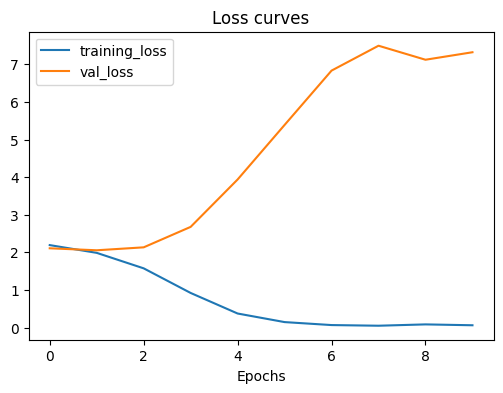

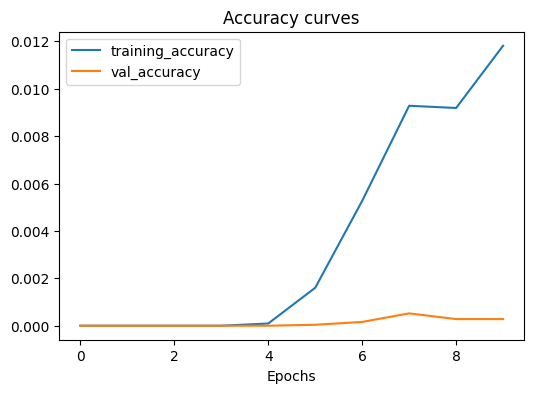

In [30]:
plot_loss_curves(model_hist)

We have encountered with **overfitting** problem here!

### Adjust Model parameters

* **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
* **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
* **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
* **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

Preventing from overfitting is also referred to as **regularization**!

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [33]:
# Try a simplified model (removed two layers)
tinyVGG_model_simple = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

tinyVGG_model_simple.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

model_simple_hist = tinyVGG_model_simple.fit(train_data,
                          epochs=10,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 55s 230ms/step - loss: 2.0844 - accuracy: 0.2571 - val_loss: 2.0170 - val_accuracy: 0.2892
Epoch 2/10
235/235 [==============================] - 54s 229ms/step - loss: 1.7674 - accuracy: 0.4008 - val_loss: 1.8993 - val_accuracy: 0.3424
Epoch 3/10
235/235 [==============================] - 53s 226ms/step - loss: 1.4506 - accuracy: 0.5232 - val_loss: 1.8684 - val_accuracy: 0.3496
Epoch 4/10
235/235 [==============================] - 72s 307ms/step - loss: 1.0235 - accuracy: 0.6832 - val_loss: 2.1111 - val_accuracy: 0.3364
Epoch 5/10
235/235 [==============================] - 64s 272ms/step - loss: 0.5886 - accuracy: 0.8335 - val_loss: 2.3886 - val_accuracy: 0.3204
Epoch 6/10
235/235 [==============================] - 48s 205ms/step - loss: 0.2968 - accuracy: 0.9308 - val_loss: 2.9558 - val_accuracy: 0.3060
Epoch 7/10
235/235 [==============================] - 54s 230ms/step - loss: 0.1202 - accuracy: 0.9800 - val_loss: 3.4063 - val_ac

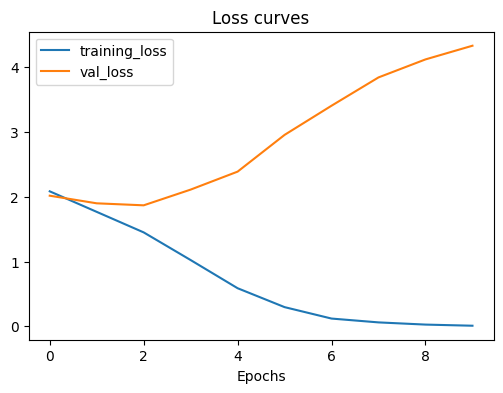

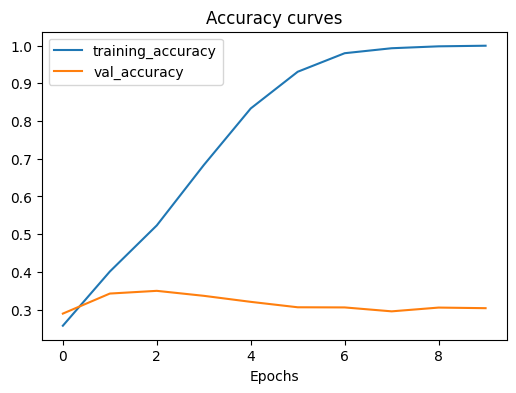

In [34]:
plot_loss_curves(model_simple_hist)

Results are still dramatically bad for predicting foods correctly

### Data Augmentation

To create augmented data, we'll recreate a new **ImageDataGenerator** instance, this time adding some parameters such as rotation_range and horizontal_flip to manipulate our images.

In [35]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255., rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='categorical')

Found 7500 images belonging to 10 classes.


### Clone the base model for training the augmented data

Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called **clone_model** which can take an existing model and rebuild it in the same format.

The cloned version will not include any of the weights (patterns) the original model has learned. So when we train it, it'll be like training a model from scratch.

In [43]:
tinyVGG_model_clone = tf.keras.models.clone_model(tinyVGG_model_simple)

# Compile the cloned model (same setup as used for model_10)
tinyVGG_model_clone.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Fit the model
model_clone_hist = tinyVGG_model_clone.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 123s 519ms/step - loss: 2.2333 - accuracy: 0.1763 - val_loss: 2.0815 - val_accuracy: 0.2424
Epoch 2/5
235/235 [==============================] - 153s 651ms/step - loss: 2.1407 - accuracy: 0.2352 - val_loss: 2.0668 - val_accuracy: 0.2708
Epoch 3/5
235/235 [==============================] - 132s 563ms/step - loss: 2.0571 - accuracy: 0.2793 - val_loss: 1.9076 - val_accuracy: 0.3500
Epoch 4/5
235/235 [==============================] - 144s 612ms/step - loss: 2.0050 - accuracy: 0.3020 - val_loss: 1.8966 - val_accuracy: 0.3400
Epoch 5/5
235/235 [==============================] - 150s 637ms/step - loss: 1.9602 - accuracy: 0.3193 - val_loss: 1.7950 - val_accuracy: 0.4024


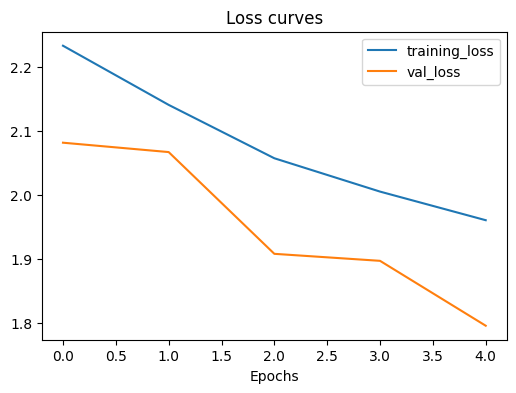

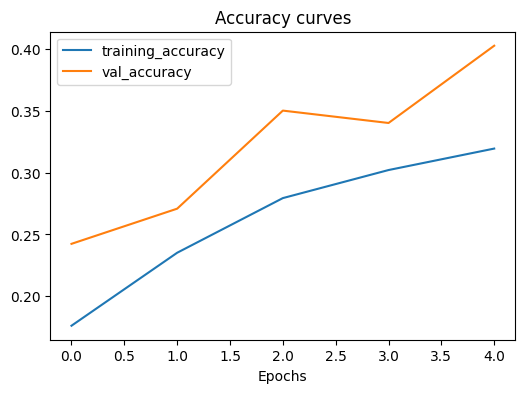

In [44]:
plot_loss_curves(model_clone_hist)

In [45]:
tinyVGG_model_clone.evaluate(test_data)

79/79 [==============================] - 14s 183ms/step - loss: 1.7950 - accuracy: 0.4024


[1.795032024383545, 0.4023999869823456]

### Making predictions with trained model

In [41]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [48]:
"""
Reads an image from filename, turns it into a tensor
and reshapes it to (img_shape, img_shape, colour_channel).
"""
def load_and_prepare_img(filename, img_shape=(224,224)):
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor
  img = tf.image.decode_image(img, channels=3)

  img = (tf.image.resize(img, size=img_shape)) / 255.

  return img

In [49]:
"""
Imports an image located at filename, makes a prediction on it with
a trained model and plots the image with the predicted class as the title.
"""
def pred_and_plot(model, filename, class_names):
  img = load_and_prepare_img(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))  # IMG shape = (W, H, C) predict function wait input shape as (B, W, H, C)

  # Check multi class classification
  if len(pred[0] > 1):
    pred_class = class_names[pred.argmax()]
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])]  # Only one output 0 or 1

  # Plot image and print predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

\>> img = load_and_prepare_img('03-steak.jpeg')

\>> pred = tinyVGG_model_clone.predict(tf.expand_dims(img, axis=0))

\>> pred

array([[0.06171669, 0.07125942, 0.04743877, 0.19769411, 0.07495934,
        0.11439274, 0.01990574, 0.06734344, 0.22800852, 0.11728126]],
      dtype=float32)

\>> pred.argmax()

8

1/1 [==============================] - 0s 236ms/step


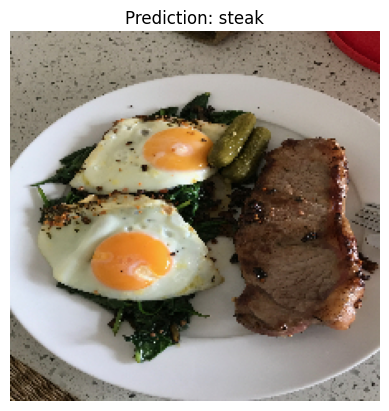

In [50]:
pred_and_plot(tinyVGG_model_clone, '03-steak.jpeg', class_names)

### Saving and loading the model

We can use **save** and **load_model** functions for this purpose.

### Save model

In [60]:
tinyVGG_model_clone.save('tinyVGG_model')

### Load Model

In [61]:
loaded_model = tf.keras.models.load_model('tinyVGG_model')

In [62]:
loaded_model.evaluate(test_data)

79/79 [==============================] - 15s 188ms/step - loss: 1.7950 - accuracy: 0.4024


[1.7950316667556763, 0.4023999869823456]

### Reference

https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/03_convolutional_neural_networks_in_tensorflow.ipynb#scrollTo=-NU_ux7VqtRZ